In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path="/content/sample_data/Advertising.csv"
 
df_Adv = pd.read_csv(path)
print(df_Adv)

X = df_Adv[['TV', 'Radio', 'Newspaper']]
y = df_Adv['Sales']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
 test_size=0.2,
random_state=42)



     Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]


Prediction	Actual Value
16.41			16.900000
20.89			22.400000
21.55			21.400000
10.61			7.300000
22.11			24.700000
13.11			12.600000
21.06			22.300000
7.46			8.400000
13.61			11.500000
15.16			14.900000
0.899438024100912


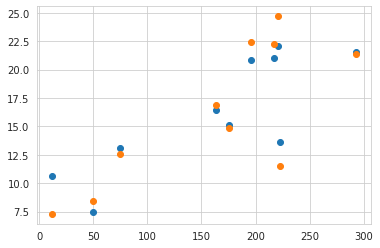

In [46]:


from sklearn.linear_model import LinearRegression
linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)
m = linearRegression.predict(X_test[:10])
n = y_test[:10].values
print('Prediction\tActual Value')
for i in range(10):
 print("%.2f\t\t\t%f"%(m[i], n[i]))
r2_Score = linearRegression.score(X_test, y_test)
print(r2_Score)


plt.scatter(X_test.iloc[:10,0],m)
plt.scatter(X_test.iloc[:10,0],n)
plt.show()



In [61]:
import statsmodels.api as sm      
x_train = sm.add_constant(X_train)
lm_1 = sm.OLS(y_train, X_train).fit()
lm_1.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              2935.
Date:                Thu, 09 Jun 2022   Prob (F-statistic):                   1.28e-137
Time:                        09:17:33   Log-Likelihood:                         -336.65
No. Observations:                 160   AIC:                                      679.3
Df Residuals:                     157   BIC:                                      688.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0531      0.001     36.467      0.000       0.050       0.056
Radio          0.2188      0.011     20.138      0.000       0.197       0.240
Newspaper      0.0239      0.008      3.011      0.003       0.008       0.040
==============================================================================
Omnibus:                       11.405   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.574
Skew:                          -0.432   Prob(JB):                     0.000415
Kurtosis:                       4.261   Cond. No.                         13.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""